<div id="top">
<!-- <div style="background-image: url(https://www.emtmadrid.es/getattachment/da3be644-cb9d-44db-8011-e3f40f1c5c34); opacity: 0.2"/> -->
<img src="https://www.gmv.com/sites/default/files/content/image/2021/11/03/115/gmv_rgbredblack.png" alt="GMV Logo" style="width: 200px">
<img src="https://www.upm.es/sfs/Rectorado/Gabinete%20del%20Rector/Logos/UPM/CEI/LOGOTIPO%20leyenda%20color%20JPG%20p.png" alt="UPM Logo" style="float: right; width: 200px">
<h1><b>EDA: AEMET dataset 🌥️</b></h1>
<h5 style="text-align: right">INESDATA-MOV</h5>
</div>

# Análisis EDA

En este cuaderno se realiza el análisis de datos exploratorio (EDA) del dataset de [AEMET](https://www.aemet.es/es/portada). Una vez realizado el análisis de calidad se estudiará para el dataset resultante:

* Valores nulos y unicidad de las variables
* Correlaciones entre las variables
* Outliers de las variables seleccionadas

Con ello se pretende hacer un filtrado de las variables que no dispongan de información relevante para el modelo o variables con la misma información. Por otro lado se hará un estudio de los valores nulos para, en caso de que sea pertinente, reconstruir estos datos. 

Además es conveniente realizar un tratamiento de outliers ya que podrían distorsionar el entrenamiento del modelo.


In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ROOT_PATH = os.path.dirname(os.path.dirname(os.path.abspath(os.getcwd())))
DATA_PATH = os.path.join(ROOT_PATH, "notebooks", "aemet_dataset_qa.csv")

In [3]:
aemet_dataset = pd.read_csv(DATA_PATH)
aemet_dataset.head()

,estado_cielo,precipitacion_value,probPrecipitacion_value,probTormenta_value,nieve_value,probNieve_value,temperatura_value,sensTermica_value,humedadRelativa_value,direccion,velocidad,vientoAndRachaMax_value,day,month,year,hour,minute,second
0,12.0,0.0,NaN,NaN,0.0,NaN,8.0,5.0,77.0,SO,16.0,27.0,2,3,2024,0,0,0
1,15.0,0.0,NaN,NaN,0.0,NaN,8.0,5.0,80.0,O,17.0,27.0,2,3,2024,1,0,0
2,15.0,0.0,0.0,0.0,0.0,0.0,8.0,5.0,82.0,O,17.0,33.0,2,3,2024,2,0,0
3,16.0,0.0,0.0,0.0,0.0,0.0,8.0,5.0,84.0,SO,20.0,40.0,2,3,2024,3,0,0
4,16.0,0.0,0.0,0.0,0.0,0.0,8.0,4.0,86.0,O,25.0,35.0,2,3,2024,4,0,0


## Valores nulos

<h10>En esta sección se observará si existe alguna variable que disponga de valores nulos y si estos pueden ser reconstruidos. </h10>

In [4]:
aemet_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   estado_cielo             661 non-null    float64
 1   precipitacion_value      661 non-null    float64
 2   probPrecipitacion_value  659 non-null    float64
 3   probTormenta_value       659 non-null    float64
 4   nieve_value              661 non-null    float64
 5   probNieve_value          659 non-null    float64
 6   temperatura_value        661 non-null    float64
 7   sensTermica_value        661 non-null    float64
 8   humedadRelativa_value    661 non-null    float64
 9   direccion                651 non-null    object 
 10  velocidad                651 non-null    float64
 11  vientoAndRachaMax_value  661 non-null    float64
 12  day                      661 non-null    int64  
 13  month                    661 non-null    int64  
 14  year                     6

In [5]:
aemet_dataset.head()

,estado_cielo,precipitacion_value,probPrecipitacion_value,probTormenta_value,nieve_value,probNieve_value,temperatura_value,sensTermica_value,humedadRelativa_value,direccion,velocidad,vientoAndRachaMax_value,day,month,year,hour,minute,second
0,12.0,0.0,NaN,NaN,0.0,NaN,8.0,5.0,77.0,SO,16.0,27.0,2,3,2024,0,0,0
1,15.0,0.0,NaN,NaN,0.0,NaN,8.0,5.0,80.0,O,17.0,27.0,2,3,2024,1,0,0
2,15.0,0.0,0.0,0.0,0.0,0.0,8.0,5.0,82.0,O,17.0,33.0,2,3,2024,2,0,0
3,16.0,0.0,0.0,0.0,0.0,0.0,8.0,5.0,84.0,SO,20.0,40.0,2,3,2024,3,0,0
4,16.0,0.0,0.0,0.0,0.0,0.0,8.0,4.0,86.0,O,25.0,35.0,2,3,2024,4,0,0


<h10> Se observa que todas las variables están completas a excepción de las variables que indican probabilidad (ya sea de lluvia, tormenta o nieve) o las variables de dirección y velocidad. De las primeras variables, sólo existen un par de valores nulos debido a no tener datos del día anterior (aparecen para el primer día de todos). Además es probable que estas variables se eliminen por fuerte correlación con la precipitación y la nieve previstas.

De las segundas variables no se posee información para pocos valores. En la tabla posterior vemos si existe algún patrón para esto.</h10>

In [6]:
aemet_dataset[aemet_dataset.direccion.isnull()]

,estado_cielo,precipitacion_value,probPrecipitacion_value,probTormenta_value,nieve_value,probNieve_value,temperatura_value,sensTermica_value,humedadRelativa_value,direccion,velocidad,vientoAndRachaMax_value,day,month,year,hour,minute,second
432,12.0,0.0,0.0,0.0,0.0,0.0,17.0,17.0,51.0,NaN,NaN,0.0,22,3,2024,1,0,0
455,17.0,0.0,0.0,0.0,0.0,0.0,17.0,17.0,42.0,NaN,NaN,0.0,23,3,2024,1,0,0
478,12.0,0.0,0.0,0.0,0.0,0.0,18.0,18.0,42.0,NaN,NaN,0.0,24,3,2024,1,0,0
501,17.0,0.0,10.0,10.0,0.0,0.0,18.0,18.0,43.0,NaN,NaN,0.0,25,3,2024,1,0,0
524,16.0,0.0,95.0,75.0,0.0,0.0,12.0,12.0,76.0,NaN,NaN,0.0,26,3,2024,1,0,0
547,12.0,0.0,60.0,60.0,0.0,10.0,5.0,1.0,85.0,NaN,NaN,0.0,27,3,2024,1,0,0
570,16.0,0.0,50.0,50.0,0.0,0.0,11.0,11.0,75.0,NaN,NaN,0.0,28,3,2024,1,0,0
593,16.0,0.0,100.0,60.0,0.0,0.0,13.0,13.0,82.0,NaN,NaN,0.0,29,3,2024,1,0,0
616,16.0,0.0,40.0,40.0,0.0,0.0,5.0,3.0,93.0,NaN,NaN,0.0,30,3,2024,1,0,0
639,16.0,0.0,100.0,90.0,0.0,0.0,8.0,6.0,82.0,NaN,NaN,0.0,31,3,2024,1,0,0


## Unicidad de las variables

<h10>En algunos casos es probable que una variable disponga de un único valor o de poca variabilidad. En estos casos sería recomendable quitar la variable del dataset.</h10>

In [7]:
aemet_dataset.columns

Index(['estado_cielo', 'precipitacion_value', 'probPrecipitacion_value',
       'probTormenta_value', 'nieve_value', 'probNieve_value',
       'temperatura_value', 'sensTermica_value', 'humedadRelativa_value',
       'direccion', 'velocidad', 'vientoAndRachaMax_value', 'day', 'month',
       'year', 'hour', 'minute', 'second'],
      dtype='object')

In [8]:
# Estado cielo
aemet_dataset.estado_cielo.value_counts()

estado_cielo
17.0    169
11.0    163
16.0    105
12.0     61
46.0     47
64.0     47
15.0     27
43.0     15
14.0     10
36.0      3
54.0      3
45.0      2
26.0      2
82.0      2
63.0      1
44.0      1
81.0      1
62.0      1
13.0      1
Name: count, dtype: int64

In [9]:
# Precipitacion
aemet_dataset.precipitacion_value.value_counts()

precipitacion_value
0.0    539
0.1     52
0.2     17
1.0     14
0.9      7
0.5      6
0.4      6
0.3      5
0.8      3
0.7      3
3.0      3
2.0      3
0.6      1
6.0      1
4.0      1
Name: count, dtype: int64

In [10]:
# Probabilidad de precipitacion
aemet_dataset.probPrecipitacion_value.value_counts()

probPrecipitacion_value
0.0      369
100.0    130
5.0       33
90.0      24
95.0      23
55.0      12
10.0      11
65.0       6
70.0       6
80.0       6
15.0       6
85.0       6
25.0       6
35.0       6
60.0       5
50.0       5
40.0       5
Name: count, dtype: int64

In [11]:
# Probabilidad de tormenta
aemet_dataset.probTormenta_value.value_counts()

probTormenta_value
0.0     375
80.0     42
5.0      33
95.0     24
55.0     24
75.0     23
60.0     22
70.0     18
25.0     18
50.0     17
65.0     12
85.0     12
90.0     11
10.0     11
15.0      6
35.0      6
40.0      5
Name: count, dtype: int64

In [12]:
# Nieve
aemet_dataset.nieve_value.value_counts()

# En este caso se observa que sólo existe  un valor para la variable 
# nieve pero, a pesar de ello en el caso de que sí que existiese nieve
# este dato sería relevante para nuestro problema.

nieve_value
0.0    661
Name: count, dtype: int64

In [13]:
# Probabilidad nieve
aemet_dataset.probNieve_value.value_counts()

probNieve_value
0.0     648
30.0      6
10.0      5
Name: count, dtype: int64

In [14]:
# Temperatura
aemet_dataset.temperatura_value.value_counts()

temperatura_value
8.0     66
6.0     60
7.0     51
9.0     49
10.0    48
14.0    44
12.0    43
11.0    41
13.0    41
15.0    34
16.0    24
5.0     22
18.0    21
17.0    20
19.0    15
20.0    13
21.0    12
24.0    11
22.0    11
4.0     10
3.0      7
23.0     6
25.0     5
2.0      3
26.0     2
1.0      1
27.0     1
Name: count, dtype: int64

In [15]:
# Sensación térmica
aemet_dataset.sensTermica_value.value_counts()

sensTermica_value
 4.0     56
 10.0    48
 5.0     46
 14.0    44
 12.0    43
 11.0    41
 13.0    41
 3.0     38
 6.0     36
 15.0    34
 16.0    24
 2.0     21
 18.0    21
 17.0    20
 7.0     20
 8.0     19
 1.0     19
 19.0    15
 20.0    13
 21.0    12
 22.0    11
 24.0    11
 9.0      6
 23.0     6
 25.0     5
-1.0      4
 0.0      3
 26.0     2
-3.0      1
 27.0     1
Name: count, dtype: int64

In [16]:
# Humedad relativa
aemet_dataset.humedadRelativa_value.value_counts()

humedadRelativa_value
76.0    20
86.0    19
74.0    19
82.0    18
81.0    18
        ..
95.0     2
99.0     2
23.0     1
24.0     1
28.0     1
Name: count, Length: 76, dtype: int64

In [17]:
# Dirección
aemet_dataset.direccion.value_counts()

direccion
SO    143
NE    135
O     117
S     104
SE     54
E      48
NO     37
N      13
Name: count, dtype: int64

In [18]:
# Velocidad
aemet_dataset.velocidad.value_counts()

velocidad
10.0    54
8.0     47
9.0     46
7.0     39
6.0     34
17.0    32
11.0    31
12.0    31
16.0    29
13.0    28
5.0     26
15.0    26
14.0    20
20.0    19
19.0    18
18.0    16
22.0    16
24.0    16
21.0    14
4.0     14
23.0    13
25.0     9
3.0      7
31.0     7
27.0     7
35.0     6
26.0     6
28.0     5
2.0      5
37.0     5
32.0     4
29.0     4
33.0     4
1.0      3
38.0     3
30.0     2
34.0     2
45.0     1
39.0     1
40.0     1
Name: count, dtype: int64

In [19]:
# Viento and racha máxima
aemet_dataset.vientoAndRachaMax_value.value_counts()

vientoAndRachaMax_value
16.0    27
14.0    26
15.0    26
17.0    26
18.0    26
        ..
45.0     1
1.0      1
2.0      1
49.0     1
64.0     1
Name: count, Length: 65, dtype: int64

### Correlaciones

En este punto se verá la correlación de las variables entre sí. Para este punto omitiremos las variables referentes al tiempo (año, mes, día, hora, minutos y segundos), la variable categórica de dirección y nieve (siempre tiene el mismo valor).

In [20]:
aemet_dataset_corr = aemet_dataset.drop(columns=["nieve_value", "direccion", "year", "day", "month", "hour", "minute", "second"])

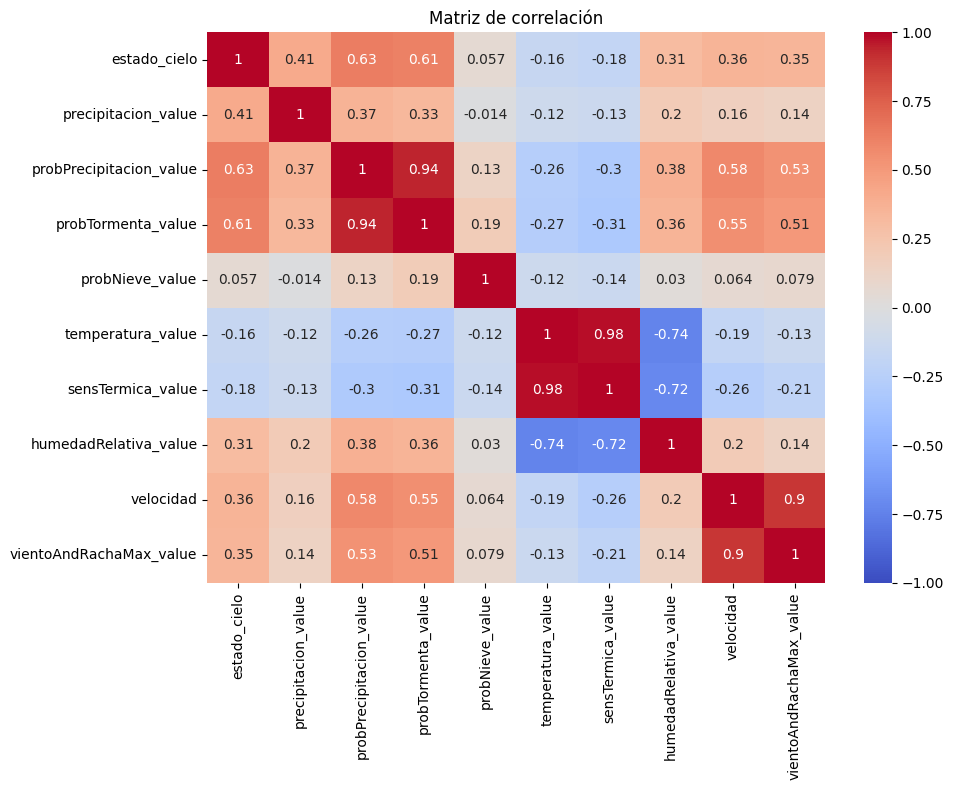

In [21]:
# Calcular la matriz de correlación
correlation_matrix = aemet_dataset_corr.corr(numeric_only=True)

plt.figure(figsize=(10, 8))  # Tamaño de la figura
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')  

plt.title('Matriz de correlación')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.yticks(rotation=0)   # No rotar las etiquetas del eje y
plt.tight_layout()       # Ajustar el diseño para evitar que las etiquetas se superpongan

plt.show()

<h10> En la matriz de correlación anterior se observa que existen variables en nuestro dataset que proporcionan la misma información que otras. Por ejemplo:

* probPrecipitacion_value <-> probTormenta_value
* sensTermica_value <-> temperatura_value
* vientoAndRachaMax_value <-> velocidad

Por lo tanto, podríamos prescindir de *probPrecipitacion_value*, *sensTermica_value* y *vientoAndRachaMax_value*. Además, vemos que *probPrecipitacion_value*, *probTormenta_value* y *probNieve_value* no están muy correladas con la precipitación o la nieve por lo que puede que nos estén dando información no fiable.
</h10>

In [22]:
aemet_dataset.drop(columns=["probTormenta_value", "probNieve_value", "probPrecipitacion_value", "sensTermica_value", "vientoAndRachaMax_value"], inplace=True)

In [23]:
aemet_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   estado_cielo           661 non-null    float64
 1   precipitacion_value    661 non-null    float64
 2   nieve_value            661 non-null    float64
 3   temperatura_value      661 non-null    float64
 4   humedadRelativa_value  661 non-null    float64
 5   direccion              651 non-null    object 
 6   velocidad              651 non-null    float64
 7   day                    661 non-null    int64  
 8   month                  661 non-null    int64  
 9   year                   661 non-null    int64  
 10  hour                   661 non-null    int64  
 11  minute                 661 non-null    int64  
 12  second                 661 non-null    int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 67.3+ KB


### Outliers

<h10>En el apartado de unicidad de variables ya se observa que no existen outliers para ninguna de las variables. </h10>